# Airline Customer Satisfaction Prediction

***Datase Overview***

>
**Dataset Link**:<a href="https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data"> Kaggle link</a>
<br></br>


**Step 1: Define the Objective**

The goal of this project is to analyze the factors affecting airline customer satisfaction and build a predictive model to classify customers as 'Satisfied' or 'Dissatisfied'. Through this process, we will apply data mining techniques, explore the dataset, and select machine learning models to accurately predict satisfaction.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Data Loading & Exploration**

Download and load the dataset in Python, examine the data structure, and handle any missing values.



### 2.1 Load the dataset

In [2]:
x_train=pd.read_csv("train.csv")
x_test=pd.read_csv('test.csv')
#already divided ratio=80:20
df=pd.concat([x_train,x_test])
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [3]:
#Features Information
attFeatures = []
for i in df.columns:
    attFeatures.append([i,df[i].dtype, df[i].nunique(), df[i].sort_values().drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features','Type', 'Unique Number', 'Values'])

,Features,Type,Unique Number,Values
0,Unnamed: 0,int64,103904,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,int64,129880,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,Gender,object,2,"[Female, Male]"
3,Customer Type,object,2,"[Loyal Customer, disloyal Customer]"
4,Age,int64,75,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ..."
5,Type of Travel,object,2,"[Business travel, Personal Travel]"
6,Class,object,3,"[Business, Eco, Eco Plus]"
7,Flight Distance,int64,3821,"[31, 56, 67, 73, 74, 76, 77, 78, 80, 82, 83, 8..."
8,Inflight wifi service,int64,6,"[0, 1, 2, 3, 4, 5]"
9,Departure/Arrival time convenient,int64,6,"[0, 1, 2, 3, 4, 5]"


In [4]:
#Shape of dataframe
df.shape

(129880, 25)

In [5]:
#provides a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

In [6]:
#provides a statistical summary of numerical data
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
#provides a statistical summary of caregorical data
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


From the data description:

1.Columns like [**Flight Distance, Departure Delay in Minutes, and Arrival Delay in Minutes contain extreme values**], indicating significant variability in these metrics.

2.The dataset shows a higher percentage of [**Female passengers, Loyal Customers, Business travelers, Business class passengers, and Dissatisfied customers**].

### **Step 3. Data Cleaning and Preprocessing**

#### 3.1.Drop unnecessary columnn

In [8]:
# Drop the unnecessary columns 'Unnamed: 0' and 'id' from the DataFrame
# 'Unnamed: 0' an index column, and 'id' is typically a unique identifier not useful for analysis
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### 3.2.Handle missing values

In [9]:
# This displays the total count of missing (NaN) values per column
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

Text(0.5, 1.0, 'Histogram of Arrival Delay in Minutes')

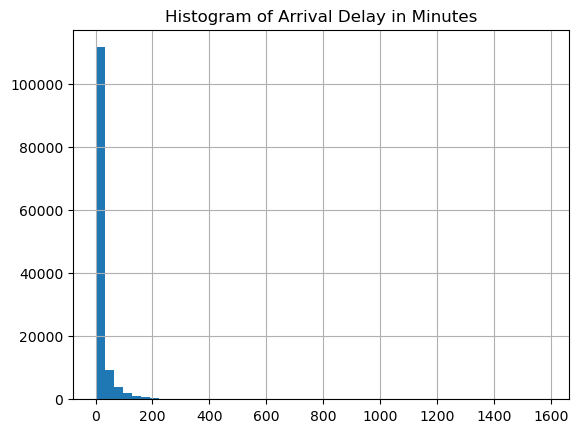

In [10]:
#analysising the values distribution for filling the values
df['Arrival Delay in Minutes'].hist(bins=50)
plt.title('Histogram of Arrival Delay in Minutes')

In [11]:
#data is skewed here so we use median here to fill null values
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [12]:
#checking dupliate
df.duplicated().sum()

0

### 3.3 Checking & Hanling Outlier

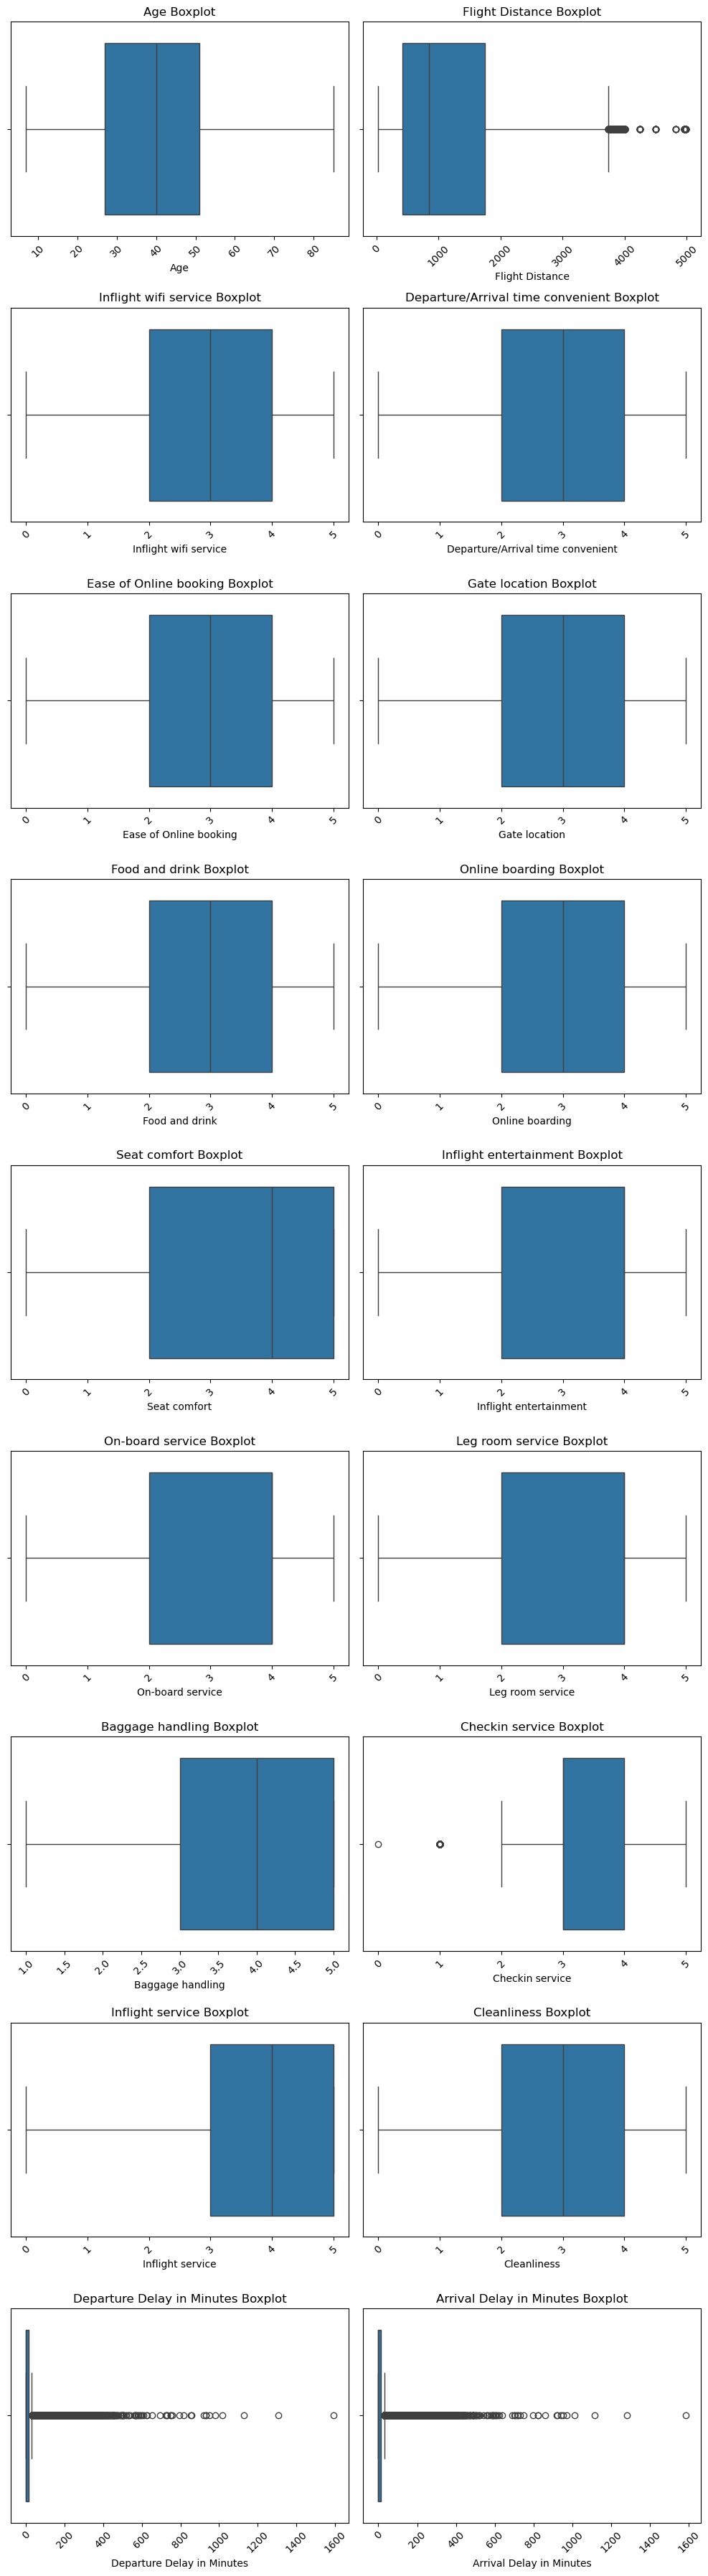

In [13]:
numerical = df.select_dtypes(include=['int', 'float']).copy()
# Calculate the number of numerical columns
num_cols = len(numerical.columns)
# Calculate the number of rows needed for subplots
num_rows = (num_cols + 1) // 2  # Ensure enough rows for all columns

# Reduced figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 4 * num_rows), dpi=100)  # Adjust figsize
axes = axes.flatten()

for idx, col in enumerate(numerical.columns):
    sns.boxplot(x=numerical[col], ax=axes[idx])
    axes[idx].set_xlabel(col)
    axes[idx].set_title(f'{col} Boxplot')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(num_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Outliers are detected in the given coloumns:

1.Arrival Delay Column.

2.Flight Distance Column.

3.Departure Delay Column.

### 3.4 10-Fold-validation score

In [14]:
# Import required libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target variable
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Create Decision Tree Classifier with pre-pruning (example: max_depth=5, min_samples_split=10)
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

# 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt_model, X, y, cv=kfold, scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

# Train the model on the entire dataset to view the tree structure
dt_model.fit(X, y)


Cross-validation scores: [0.9052202  0.90337234 0.90614413 0.90853095 0.90745303 0.90614413
 0.9026024  0.90414229 0.90414229 0.90337234]
Mean accuracy: 0.9051124114567293
Standard deviation: 0.0018314899613681758


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

### 3.5 Handling Outliers

In [15]:
def handle_outliers(df, columns):
    for column in columns:
       # Calculate the first quartile (Q1) and third quartile (Q3) for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
      # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
       # Clip values outside the lower and upper bounds to limit extreme values
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

columns_to_handle= ['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
df = handle_outliers(df, columns_to_handle)

## Step 4:Exploratory Data Analysis (EDA)

### **4.1.Exploring the Satisfaction Column**

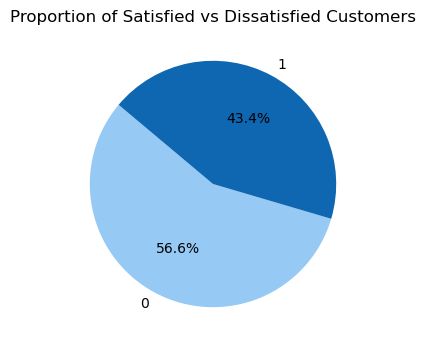

satisfaction
0    73452
1    56428
Name: count, dtype: int64

In [16]:
# Assuming 'satisfaction' column has values like 'satisfied' and 'dissatisfied'
satisfaction_counts = df['satisfaction'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140, colors=['#96C9F4', '#0F67B1'])
plt.title("Proportion of Satisfied vs Dissatisfied Customers")
plt.show()

print()
satisfaction_counts

 **2.Insights about the satisfaction levels across different features in the dataset.**

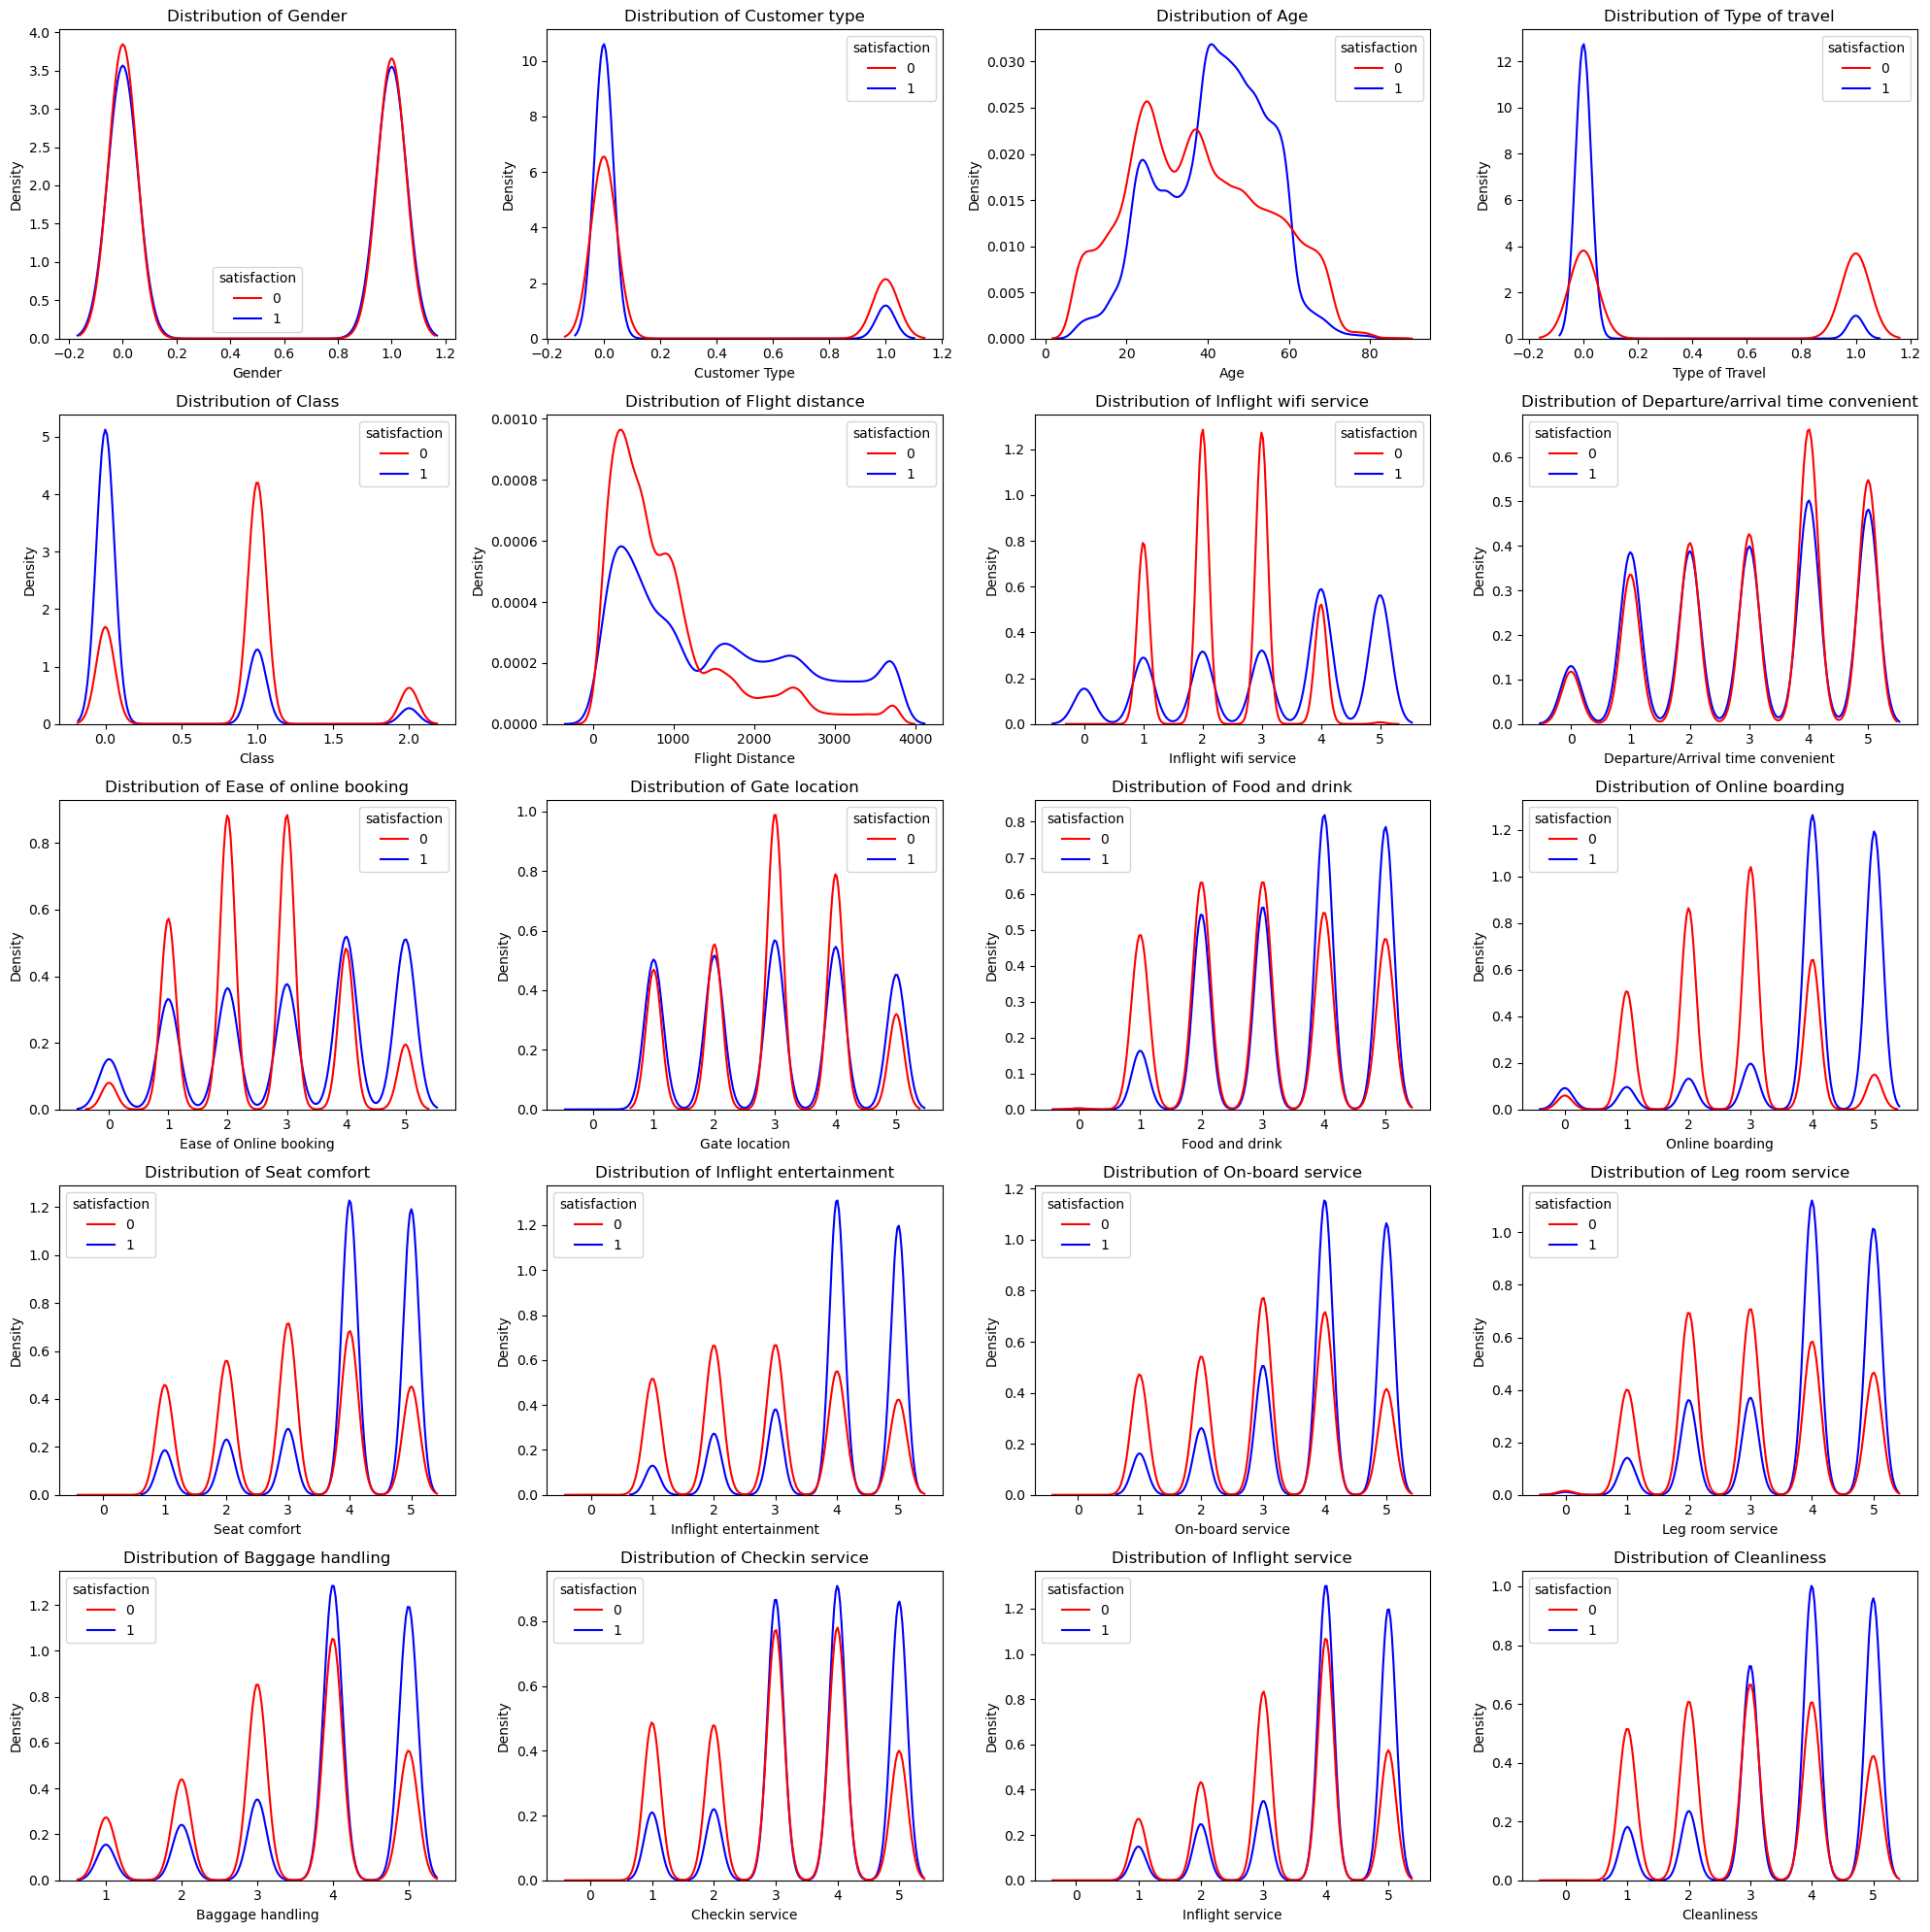

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate Categorical and Numerical Columns
cat = [col for col in df.columns if df[col].dtypes == "object"]
num = [col for col in df.columns if df[col].dtypes != "object"]

# Set up the figure and grid layout
total_plots = len(cat) + len(num)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Plot categorical features using count plots
for i, feature in enumerate(cat):
    if i >= len(axes):  # Check if we've used all axes
        break
    sns.countplot(data=df, x=feature, hue='satisfaction', palette=['red', 'blue'], ax=axes[i])
    axes[i].set_title(f"Distribution of {feature.capitalize()}")

# Plot continuous features using KDE plots
for i, feature in enumerate(num, start=len(cat)):
    if i >= len(axes):  # Check if we've used all axes
        break
    sns.kdeplot(data=df, x=feature, hue='satisfaction', palette=['red', 'blue'], common_norm=False, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature.capitalize()}")

# Hide any unused axes
for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


**Inferences for Each Feature**

1. **Class**
   - Business Class passengers have higher satisfaction.
   - Economy and Economy Plus passengers show more dissatisfaction, indicating potential service gaps.

2. **Gender**
   - Both males and females have more dissatisfied than satisfied passengers.

3. **Customer Type**
   - Disloyal customers are mostly dissatisfied.
   - Loyal customers have a more balanced distribution between satisfied and dissatisfied.

4. **Type of Travel**
   - Business travelers tend to be more satisfied.
   - Personal travelers show higher dissatisfaction.

5. **Age**
   - Younger passengers display mixed satisfaction, with a noticeable portion dissatisfied.
   -Older individuals tend to be more satisfied.

6. **Flight Distance**
   - Longer flights have more dissatisfied passengers, suggesting that comfort may diminish on longer trips.

7. **Inflight Wi-Fi Service**
   - Poor Wi-Fi ratings correlate with dissatisfaction, indicating a need for better connectivity.

8. **Departure/Arrival Time Convenience**
   - Passengers dissatisfied with timing convenience are less likely to be satisfied overall.

9. **Ease of Online Booking**
   - Lower ratings for online booking ease lead to dissatisfaction, highlighting the need for user-friendly booking.

10. **Gate Location**
    - Passengers who rate gate location poorly are more likely to be dissatisfied.

11. **Food and Drink**
    - Lower food ratings are associated with dissatisfaction, indicating room for improvement in catering.

12. **Online Boarding**
    - Passengers who rate online boarding low tend to be more dissatisfied.

13. **Seat Comfort**
    - Poor seat comfort ratings strongly correlate with dissatisfaction.

14. **Inflight Entertainment**
    - Passengers with low entertainment ratings are mostly dissatisfied, suggesting a need for better content options.

15. **On-board Service**
    - Low ratings in on-board service lead to dissatisfaction, highlighting an area to improve.

16. **Leg Room Service**
    - Passengers who find leg room inadequate are more dissatisfied.

17. **Baggage Handling**
    - Poor baggage handling ratings correlate with dissatisfaction.

18. **Check-in Service**
    - Lower check-in service ratings are associated with dissatisfaction.

19. **Inflight Service**
    - Poor inflight service ratings are linked with dissatisfaction.

---

**Summary**: Dissatisfaction is commonly linked to low ratings across service and comfort aspects, especially for Economy passengers and long-distance travelers.


**3.Correlation Heatmap for numerical columns**

In [18]:
#Separating Categorical and Numerical Columns
cat = [col for col in df.columns if df[col].dtypes == "object"]
numerical = [col for col in df.columns if df[col].dtypes != "object"]

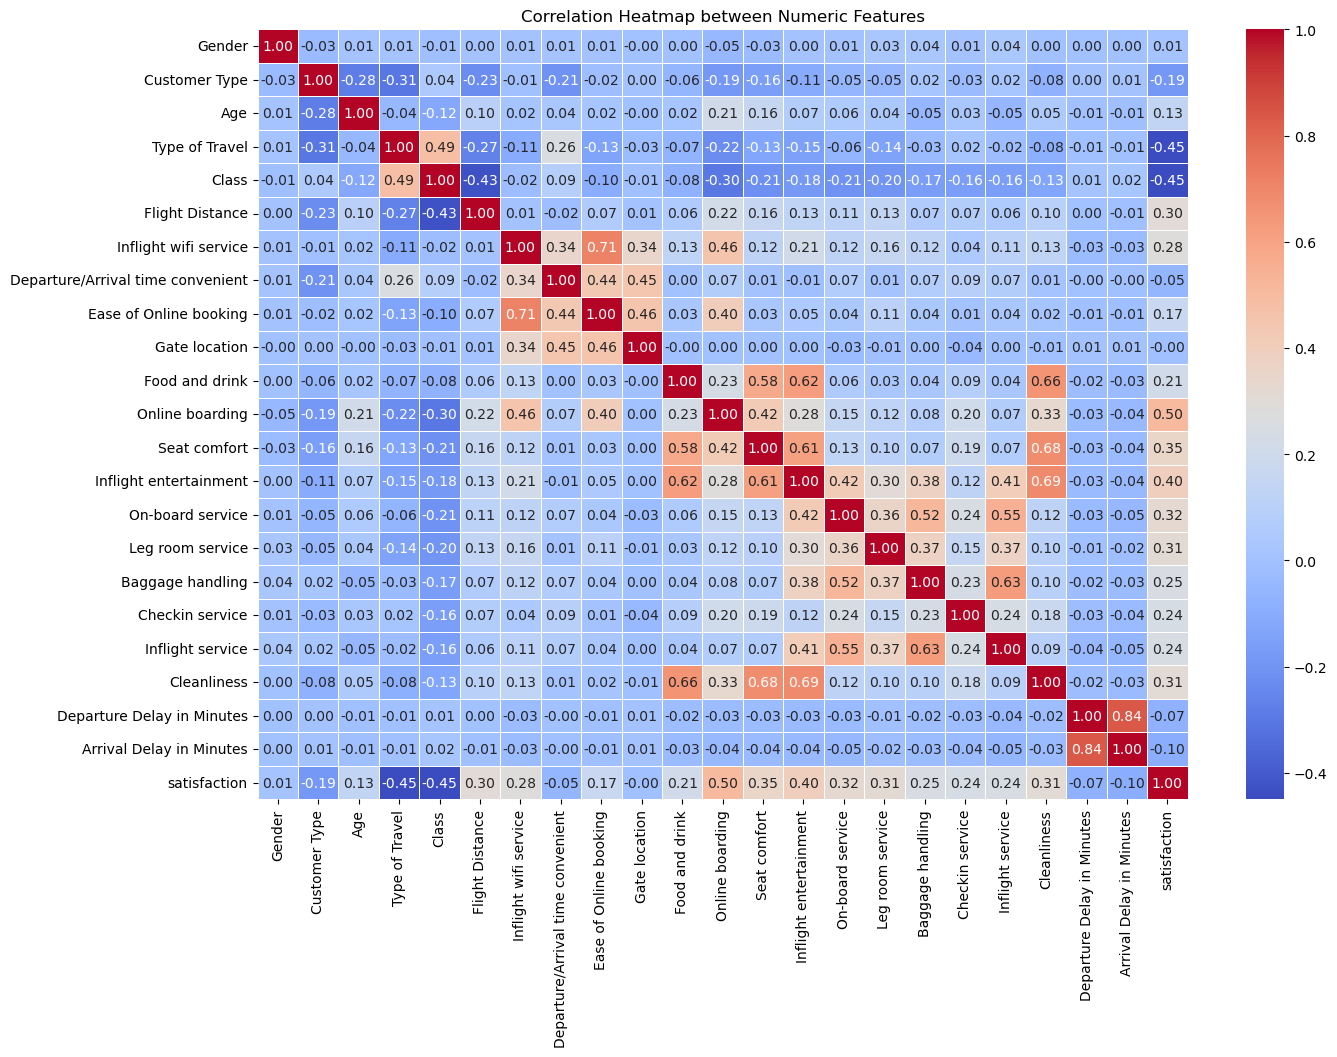

In [19]:
#Calculate the correlation matrix for numerical columns
corr = df[numerical].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap between Numeric Features')
plt.show()

***High Positive Correlations***

- **Check-in Service and Inflight Service**:
  - **Interpretation**: Passengers who rate one of these services highly are likely to rate the other one highly as well.

- **Departure Delay in Minutes and Arrival Delay in Minutes**:
  - **Interpretation**: Longer departure delays are likely to result in longer arrival delays.

- **Cleanliness**:
  - **Interpretation**: Perception of cleanliness could impact satisfaction with inflight services and food.

***Moderate Positive Correlations***

- **Seat Comfort**:
  - **Interpretation**: Passengers who find the boarding process and on-board service smooth also tend to find the seating comfortable.

- **Ease of Online Booking**:
  - **Interpretation**: Passengers who value convenient online booking also appreciate a good inflight Wi-Fi experience.

***Low or No Correlation***

- **Age**:
  - **Observation**: Shows very low or almost no correlation with most other features, indicating that age does not strongly impact service ratings or delays in this dataset.

- **Flight Distance**:
  - **Observation**: Exhibits low correlation with other features, suggesting that distance does not significantly influence service ratings or delays.


# Step 5: Feature Engineering

### **1.Droping the Departure Delay in Minutes as highly correlated**

In [20]:
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)


In [21]:
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix , precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression


### **2.Encoding Categorical Variables**

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Class'] = le.fit_transform(df['Class'])
df['satisfaction'] = le.fit_transform(df['satisfaction'])

### **3.Splitting Data into Features and Labels**

In [23]:
# Separate features and target variable
x = df.drop("satisfaction",axis = 1)
y = df["satisfaction"]

In [24]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets 80:20
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [25]:
x_train.shape , x_test.shape

((103904, 21), (25976, 21))

### **4.Standardizing Features**

In [26]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit the scaler on the training data and transform it
x_train = scaler.fit_transform(x_train) # Standardizes x_train by removing the mean and scaling to unit variance
# Transform the testing data using the same scaler
x_test = scaler.transform(x_test)# Applies the same transformation to x_test using parameters from x_train

##  Step 6.Model Training and Evaluation

- Logistic Regression
- Decision Tree
- Random Forest

### 1.Logistic regreession

Accuracy of Train :  0.8740183246073299
Accuracy of Test :  0.8753079765937789
The total accuracy score of the model is:  87.5307976593779




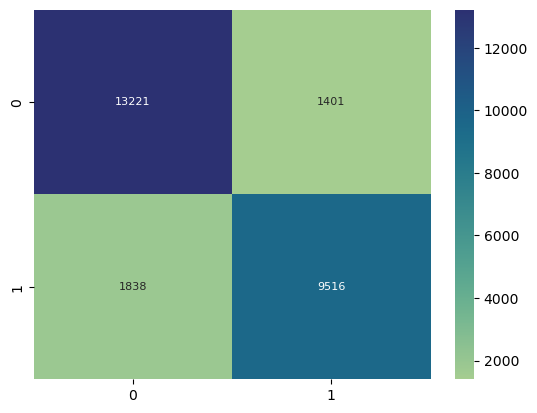

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14622
           1       0.87      0.84      0.85     11354

    accuracy                           0.88     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix , precision_score, recall_score, f1_score, classification_report
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

print('Accuracy of Train : ',classifier.score(x_train, y_train))
print('Accuracy of Test : ',classifier.score(x_test, y_test))
y_pred = classifier.predict(x_test)
acc_score_LR = accuracy_score(y_test,y_pred)
print("The total accuracy score of the model is: ",acc_score_LR*100)
print()
print()
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 8},fmt="g", cmap="crest")
plt.show()
print(classification_report(y_test,y_pred))

## 2.Decision tree

DTModel Train Score is :  1.0
DTModel Test Score is :  0.9491453649522636
The total accuracy score of the model is:  94.91453649522637




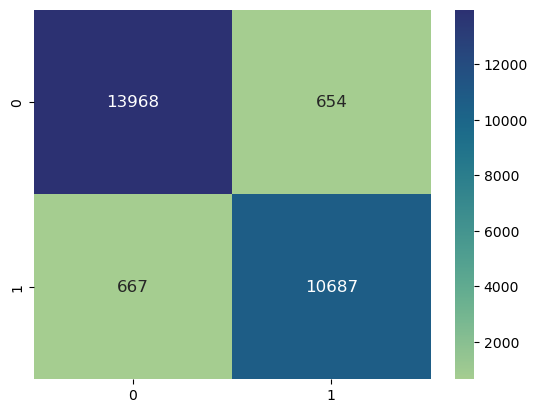

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14622
           1       0.94      0.94      0.94     11354

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



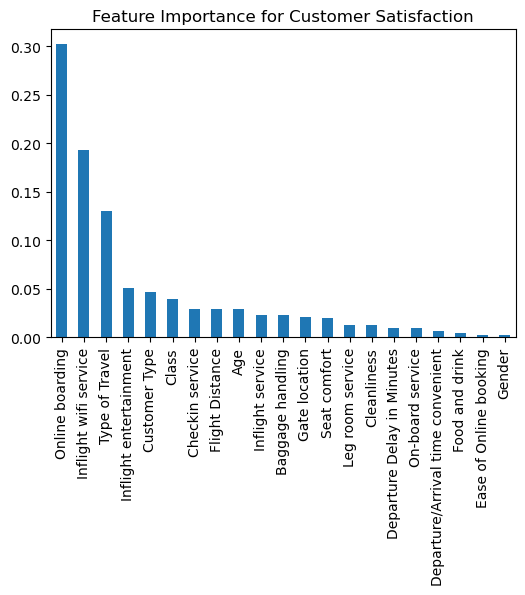

In [28]:
from sklearn.tree import DecisionTreeClassifier
DTModel = DecisionTreeClassifier(criterion='entropy')
DTModel.fit(x_train,y_train)
print('DTModel Train Score is : ',DTModel.score(x_train,y_train))
print('DTModel Test Score is : ',DTModel.score(x_test,y_test))
y_pred=DTModel.predict(x_test)
acc_score_DT = accuracy_score(y_test,y_pred)
print("The total accuracy score of the model is: ",acc_score_DT*100)
print()
print()

from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()
print(classification_report(y_test,y_pred))

# Get feature importance
importance = DTModel.feature_importances_
feature_importance = pd.Series(importance, index=x.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(6, 4))
feature_importance.plot(kind='bar')
plt.title('Feature Importance for Customer Satisfaction')
plt.show()


We can say that online boarding, Wi-Fi service, type of travel, customer type, and entertainment are the features that most significantly influence customer satisfaction. Therefore, the company should pay attention to these factors.

### 3. Random Forest

RTModel Train Score is :  0.9999807514628888
RTModel Test Score is :  0.9621188789651987
The total accuracy score of the model is:  96.21188789651987




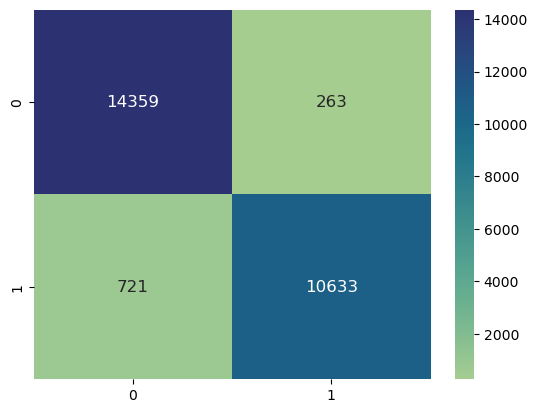

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14622
           1       0.98      0.94      0.96     11354

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [29]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(criterion='entropy')
RFModel.fit(x_train,y_train)
print('RTModel Train Score is : ',RFModel.score(x_train,y_train))
print('RTModel Test Score is : ',RFModel.score(x_test,y_test))
y_pred=RFModel.predict(x_test)
acc_score_RF = accuracy_score(y_test,y_pred)
print("The total accuracy score of the model is: ",acc_score_RF*100)
print()
print()

from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()
print(classification_report(y_test,y_pred))

### Comparing the model accuracy via Bar Plot

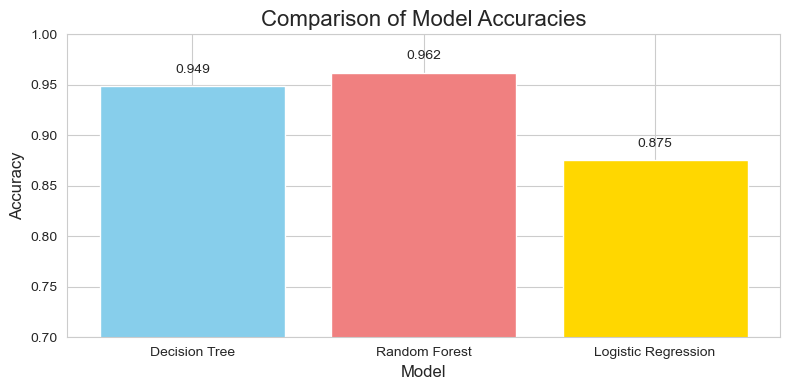

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['Decision Tree','Random Forest', 'Logistic Regression']
accuracies = [acc_score_DT,acc_score_RF, acc_score_LR]

# Set a visually appealing style
sns.set_style("whitegrid")

plt.figure(figsize=(8, 4))  # Adjust figure size for better readability
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'gold']) # Use distinct colors
plt.title('Comparison of Model Accuracies', fontsize=16) # Increase title font size
plt.xlabel('Model', fontsize=12) # Increase x-axis label font size
plt.ylabel('Accuracy', fontsize=12)  # Increase y-axis label font size
plt.ylim(0.7, 1.0)  # Adjust y-axis limits for better visualization

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()